<a href="https://colab.research.google.com/github/swapnanil123/YBI-Foundation-Project/blob/master/YBI_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand Written Digit Prediction using Random Forest.



In this poroject we create a ML model which is based on Random Forest and using this model we predict some hand written digits. The images are 8x8 black and white image.

The dataset is used in the project that is a scikit-learn dataset.

# Import Library

In [13]:
import pandas as pd

In [14]:
import numpy as np

In [15]:
import matplotlib.pyplot as plt

## Import Data

In [16]:
from sklearn.datasets import load_digits

In [17]:
data = load_digits()

## Data Describe

In [25]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [26]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

## Data Visualization

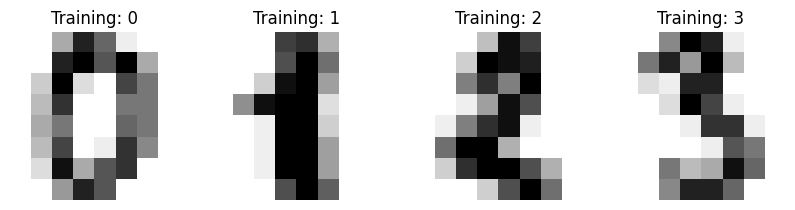

In [28]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, data.images, data.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

## Data Preprocessing

In this step we flatten the images

In [31]:
data.images.shape

(1797, 8, 8)

In [32]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [33]:
data.images[0].shape

(8, 8)

In [36]:
data_length = len(data.images)
data_length

1797

In [37]:
n_samples = data_length
reshape_data = data.images.reshape((n_samples, -1))

In [38]:
reshape_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [39]:
reshape_data[0].shape

(64,)

In [40]:
reshape_data.shape

(1797, 64)

## Scaling Image Data

In [41]:
reshape_data.min()

0.0

In [42]:
reshape_data.max()

16.0

In [43]:
reshape_data = reshape_data/16

In [45]:
reshape_data.min()

0.0

In [46]:
reshape_data.max()

1.0

In [47]:
reshape_data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(reshape_data, data.target, test_size=0.3)

In [51]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## Random Forest Model

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier()

In [54]:
rf.fit(x_train, y_train)

RandomForestClassifier()

## Prediction

In [55]:
y_pred = rf.predict(x_test)

In [56]:
y_pred

array([5, 5, 3, 0, 7, 3, 8, 5, 2, 3, 8, 1, 7, 6, 7, 5, 6, 8, 2, 2, 0, 3,
       8, 0, 3, 8, 3, 4, 8, 1, 1, 3, 0, 9, 5, 3, 1, 3, 2, 0, 5, 2, 0, 2,
       6, 5, 5, 8, 9, 0, 4, 0, 3, 8, 2, 6, 0, 5, 1, 5, 7, 7, 8, 5, 6, 2,
       4, 4, 4, 7, 2, 1, 7, 8, 4, 2, 9, 4, 0, 0, 4, 5, 2, 3, 5, 0, 2, 7,
       3, 6, 5, 1, 9, 8, 0, 5, 2, 3, 8, 7, 5, 8, 1, 3, 0, 5, 0, 9, 6, 2,
       4, 4, 5, 1, 2, 0, 9, 6, 9, 5, 6, 0, 2, 0, 0, 6, 1, 6, 1, 6, 9, 3,
       4, 8, 1, 0, 7, 6, 3, 0, 0, 6, 2, 8, 6, 3, 4, 8, 8, 0, 0, 8, 2, 0,
       7, 6, 4, 4, 8, 2, 4, 6, 3, 2, 4, 1, 5, 8, 0, 7, 9, 6, 7, 6, 7, 4,
       6, 9, 7, 3, 8, 0, 6, 9, 7, 1, 0, 8, 8, 8, 7, 6, 5, 5, 7, 0, 3, 8,
       1, 5, 1, 0, 2, 4, 2, 8, 2, 8, 0, 1, 9, 0, 9, 1, 9, 1, 8, 2, 7, 9,
       4, 1, 2, 6, 7, 4, 1, 2, 7, 1, 5, 5, 2, 7, 0, 9, 5, 8, 1, 0, 3, 1,
       0, 4, 8, 9, 2, 5, 4, 4, 3, 7, 8, 2, 3, 1, 2, 2, 6, 3, 8, 2, 0, 5,
       0, 8, 6, 7, 4, 7, 3, 1, 8, 4, 6, 1, 2, 9, 5, 4, 1, 0, 5, 0, 1, 8,
       3, 3, 2, 4, 6, 1, 1, 9, 4, 4, 8, 8, 8, 9, 8,

## Model Accuracy

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
confusion_matrix(y_test, y_pred)

array([[56,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 47,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 61,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 52,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 49,  1],
       [ 0,  1,  0,  1,  0,  2,  0,  0,  2, 42]])

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       0.95      1.00      0.97        58
           2       1.00      0.98      0.99        56
           3       0.98      1.00      0.99        47
           4       1.00      0.97      0.98        63
           5       0.96      0.96      0.96        54
           6       1.00      1.00      1.00        55
           7       0.98      0.98      0.98        51
           8       0.96      0.94      0.95        52
           9       0.89      0.88      0.88        48

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



## Explaination

In this project we train our Random forest model with 1797 hand written digits images. After evaluating our model we test our model with 30% of our main dataset. At the end of that we get 97% accuracy from our model.
Thank You.